######Context

######There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

######In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

######As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

 

######Objective

######To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.


Data Description:

* S.No.: Serial number
* Name: Name of the car which includes brand name and model name
* Location: Location in which the car is being sold or is available for purchase (cities)
* Year: Manufacturing year of the car
* Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
* Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* Transmission: The type of transmission used by the car (Automatic/Manual)
* Owner: Type of ownership
* Mileage: The standard mileage offered by the car company in kmpl or km/kg
* Engine: The displacement volume of the engine in CC
* Power: The maximum power of the engine in bhp
* Seats: The number of seats in the car
* New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
* Price: The price of the used car in INR Lakhs

###Statement of Problem:
We are given a dataset that contains the original price of used cars and the prices they are sold in different cities in India. Based on this, we want to build a regression model that predicts the price of used car, and help make business decision. The predictor variables can be both continuous and categorical. 

### **Objective: Build a model to predict the price of used cars.**


### Provide business recomendation on these questions: 
      * where to open a new center for used cars based on price of used cars?
      * Which location (or city) is popular for used cars ?
      * How is used car sell market in recent years, is it increasing or decreasing ?
      * Which type of car is more popular, manual or automatic and diesel/ petrol/LPG/CNG?

### Import the necessary packages

In [ ]:
# Load the libraries
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import seaborn as sns
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from scipy.interpolate import griddata
# Command to limit decimal values to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Command to display the graphs
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### Read the dataset

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the file
usedcars = pd.read_csv('/content/drive/MyDrive/AIML/Cars4U_Project2/used_cars_data.csv')

In [ ]:
# copying data to another varaible to avoid any changes to original data
df=usedcars.copy()

##Exploratory Data Analysis:

### Lets see the first 3 rowss of the data.

In [ ]:
df.head(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.000,5.510,1.750
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.000,16.060,12.500
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.000,8.610,4.500


### Lets check the shape of the dataset.

In [ ]:
print("The dataset contains", df.shape[0], "rows and", df.shape[1], "columns" )

The dataset contains 7253 rows and 14 columns


### Lets check the data types.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


###Check if there are any missing values

In [ ]:
# checking for missing values and which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

In [ ]:
#Lets clean the data.

In [ ]:
# let's see why Name column has object data type
#It displays a long list, so I just commented this, but I am aware of the unique names.
#df['Name'].unique().sum()

In [ ]:
df.head(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.000,5.510,1.750
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.000,16.060,12.500


###1. remove kmpl and km/kg from mileage column
###2. remove CC from Engine column
###3. remove php from Power column

In [ ]:
df['Mileage'] = df['Mileage'].str.replace('kmpl', '').str.replace('km/kg', '')
df['Engine'] = df['Engine'].str.replace('CC', '')
df['Power'] = df['Power'].str.replace('bhp', '')

###check if those suffixes are removed.

In [ ]:
df.head(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.000,5.510,1.750
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.000,16.060,12.500
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.000,8.610,4.500


###check the data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


###Since we need float and integer to fit model, change those to float.

In [ ]:
df["Mileage"] = df["Mileage"].astype(float)
df["Engine"] = df["Engine"].astype(float)
df["Power"] = df["Power"].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


###Lets check the missing values again.

In [ ]:
# checking for missing values and which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

###Since there are 7253 observation, we have a lot of data to work with. So, lets drop all NAs. This is a major step in data handling. Of course, we could impute the missing data with median or mean, but doing that would the change the standard deviation of the data. So, deleting all missing values is OK for this case:.

In [ ]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.600,998.000,58.160,5.000,5.510,1.750
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582.000,126.200,5.000,16.060,12.500
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.000,88.700,5.000,8.610,4.500
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.000,88.760,7.000,11.270,6.000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.000,140.800,5.000,53.140,17.740


In [ ]:
def obtain_Missing_Value(df1):
  miss_val = df1.isnull().sum()
  miss_val_percent = 100 * miss_val/ len(df1)
  miss_val_table = pd.concat([miss_val, miss_val_percent], axis = 1)
  miss_val_table.rename(columns = {0:'Missing Value', 1:'% of total values'}, inplace = True)
  miss_val_table = miss_val_table[miss_val_table.iloc[:,1]!=0].sort_values('% of total values', ascending = False).round(1)
  print('The dataframe has {} columns.\n'.format(df1.shape[1]))
  print('There are {} columns that have missing values.'.format(miss_val_table.shape[0]))
  return(miss_val_table)


In [ ]:
obtain_Missing_Value(df)

The dataframe has 14 columns.

There are 5 columns that have missing values.


,Missing Value,% of total values
Price,1234,17.000
Power,175,2.400
Seats,53,0.700
Engine,46,0.600
Mileage,2,0.000


*There are 17% missing values in price column. This is the column that we want to predict in our model. We cannot fill this column with median or mean. Therefore we have to drop these rows. Also as discussed above we have enough data to build model.

In [ ]:
df.dropna(inplace=True)

In [ ]:
# checking for missing values and which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

##Now, there are no missing values!!!

In [ ]:
#check the data after dropping NAs
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              5872 non-null   int64  
 1   Name               5872 non-null   object 
 2   Location           5872 non-null   object 
 3   Year               5872 non-null   int64  
 4   Kilometers_Driven  5872 non-null   int64  
 5   Fuel_Type          5872 non-null   object 
 6   Transmission       5872 non-null   object 
 7   Owner_Type         5872 non-null   object 
 8   Mileage            5872 non-null   float64
 9   Engine             5872 non-null   float64
 10  Power              5872 non-null   float64
 11  Seats              5872 non-null   float64
 12  New_Price          5872 non-null   float64
 13  Price              5872 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 688.1+ KB


###Great, we have 5872 rows of data to work with.

###Now lets fix the categorical variables. We want to include categoriacal variables in the model, so lets change them from object to categorical. Also, changing from object to categorical reduces the space occupied.

In [ ]:
df["Location"]=df["Location"].astype("category")
df["Fuel_Type"]=df["Fuel_Type"].astype("category")
df["Transmission"]=df["Transmission"].astype("category")
df["Owner_Type"]=df["Owner_Type"].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              5872 non-null   int64   
 1   Name               5872 non-null   object  
 2   Location           5872 non-null   category
 3   Year               5872 non-null   int64   
 4   Kilometers_Driven  5872 non-null   int64   
 5   Fuel_Type          5872 non-null   category
 6   Transmission       5872 non-null   category
 7   Owner_Type         5872 non-null   category
 8   Mileage            5872 non-null   float64 
 9   Engine             5872 non-null   float64 
 10  Power              5872 non-null   float64 
 11  Seats              5872 non-null   float64 
 12  New_Price          5872 non-null   float64 
 13  Price              5872 non-null   float64 
dtypes: category(4), float64(6), int64(3), object(1)
memory usage: 528.5+ KB


* Fuel_Type, Location, Transmission, and Owner_Type have been converted to categories

`see that the memory usage has decreased from 688 KB to 528 KB`

###Delete all words except first two words in Name column. It will make easier to interpret and plot.

In [ ]:
df['Name']=df['Name'].str.split(' ').str[:2].str.join('_')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              5872 non-null   int64   
 1   Name               5872 non-null   object  
 2   Location           5872 non-null   category
 3   Year               5872 non-null   int64   
 4   Kilometers_Driven  5872 non-null   int64   
 5   Fuel_Type          5872 non-null   category
 6   Transmission       5872 non-null   category
 7   Owner_Type         5872 non-null   category
 8   Mileage            5872 non-null   float64 
 9   Engine             5872 non-null   float64 
 10  Power              5872 non-null   float64 
 11  Seats              5872 non-null   float64 
 12  New_Price          5872 non-null   float64 
 13  Price              5872 non-null   float64 
dtypes: category(4), float64(6), int64(3), object(1)
memory usage: 528.5+ KB


### Give a statistical summary for the dataset.

In [ ]:
df.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
count,5872.000,5872.000,5872.000,5872.000,5872.000,5872.000,5872.000,5872.000,5872.000
mean,3013.288,2013.478,58316.999,18.278,1625.746,113.277,5.284,21.636,9.604
std,1737.351,3.165,92169.410,4.366,601.642,53.882,0.805,24.278,11.249
min,0.000,1998.000,171.000,0.000,624.000,34.200,2.000,3.910,0.440
25%,1509.750,2012.000,33422.500,15.260,1198.000,75.000,5.000,7.960,3.518
50%,3015.500,2014.000,52609.000,18.200,1495.500,97.700,5.000,11.300,5.750
75%,4516.250,2016.000,72402.750,21.100,1991.000,138.100,5.000,23.152,10.000
max,6018.000,2019.000,6500000.000,33.540,5998.000,560.000,10.000,375.000,160.000


* Ther are 5872 data in each category.
* Mean of Kilometer_driven is 58316 km. Mean kilometer driven is greater than the median, this suggests that Kilometer_driven is right skewed. Look at the maximum value, 6500000. We will look at it later if its an otlier.
* Mileage, Seats have comparable mean and median values.
* Engine, Power, Price (which is of used car), and New_price (for the same model car) all have right skewed distribution, meaning that their mean is greater than the median.

##Describe the categorical variables.

In [ ]:
df.describe(include=["category"])

,Location,Fuel_Type,Transmission,Owner_Type
count,5872,5872,5872,5872
unique,11,4,2,4
top,Mumbai,Diesel,Manual,First
freq,775,3152,4170,4839


* Location has 11 types of regions or cities. Of all Mumbai is the most frequent location, meaning most cars are sold there.
* There are four Fuel_Type cars, and the Diesel is the most popular. Of 5872 cars, 3152 are diesel type.
* There are two Transmission types, Manual is the most popular (4170 are manual out of 5872 cars).
* Most owners are first category. There are four classes of owners, and the first is the most popular (4839 are first owner out of 5872).

## Univariate analysis
The main purpose of doing univariate analysis is to understand the data central tendency and dispersion.

###Overall Observations (Histograms)

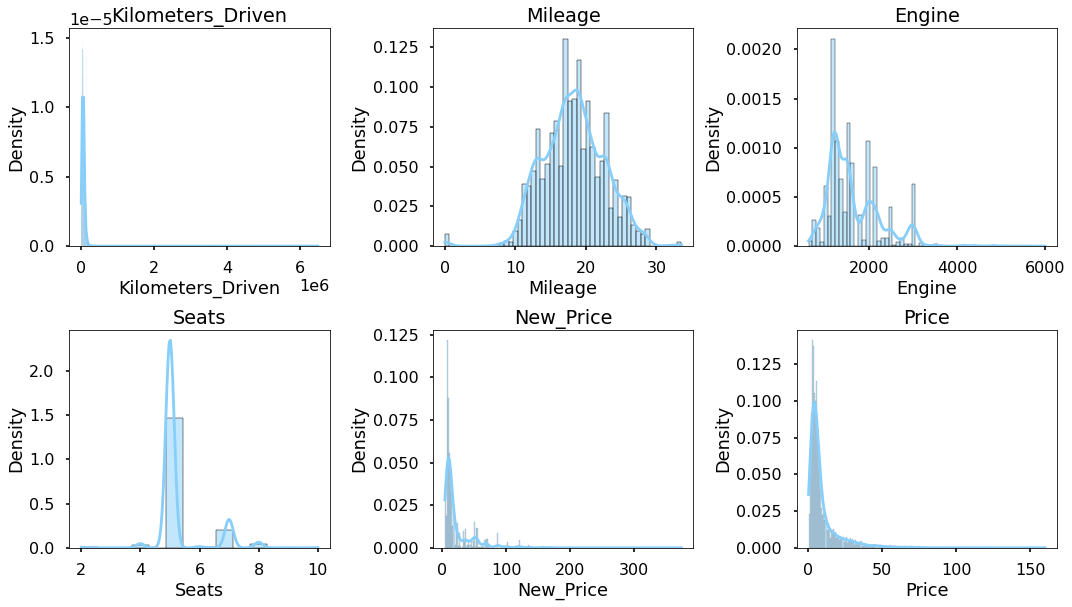

In [ ]:
#Lets select columns we want to plot.
selected_columns = ['Kilometers_Driven','Mileage','Engine','Seats','New_Price', 'Price'] #Select columns to plot
plt.figure(figsize=(15, 12)) # Figure size

for i, variable in enumerate(selected_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df,x=variable,stat='density',color = "lightskyblue",kde=True) # kde plots the density
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Distribuions are mostly right skewed (Kilometer_driven, Engine, New_Price, Price (of used cars)).
* Engine has multimodal distribution.

###Overall Observations (Boxplot)

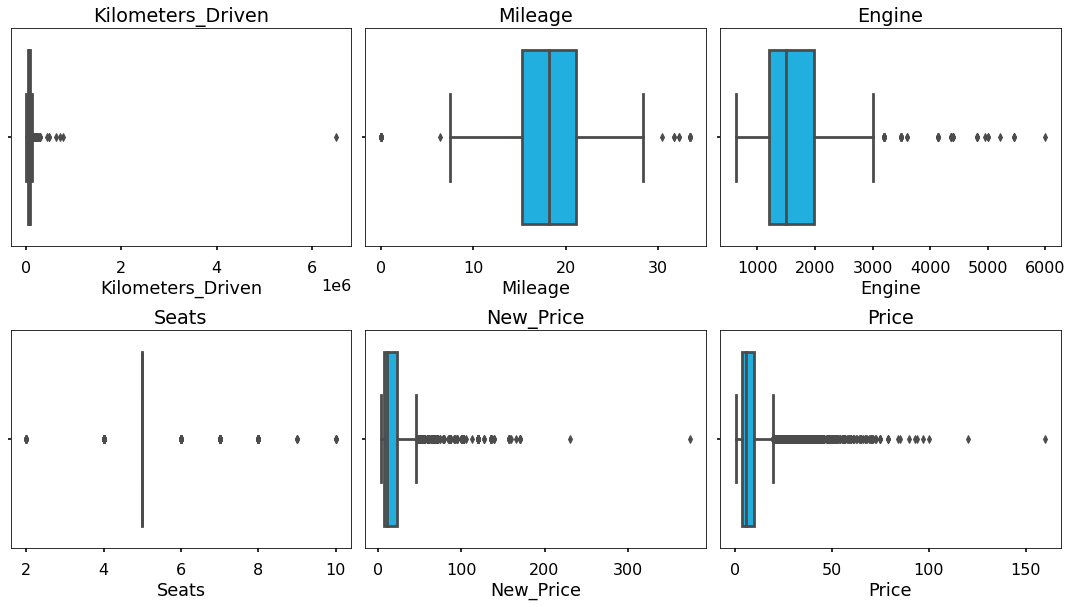

In [ ]:
selected_columns = ['Kilometers_Driven','Mileage','Engine','Seats','New_Price', 'Price']#Select columns to plot
plt.figure(figsize=(15, 12)) # Figure size

for i, variable in enumerate(selected_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=variable, color = "deepskyblue")
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All variables have outliers.
* There is one data point in Kilometers_Driven that has extremely high value. (Lets find which point is that)

In [ ]:
# I learned the method below from the Uber class project. We can make the both histogram and box plot in same plot

def Both_HistogramBoxplot(df, feature, figsize=(12, 7), kde=True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # This indicates the number of rows.
        sharex=True,  # This command will share x-axis for both plots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # This will create two subplots
    
    sns.boxplot(data=df, x=feature, ax=ax_box2, showmeans=True, color="wheat")  # This will create boxplot. Triangle indicates the mean.
    
    if bins:
      sns.histplot(data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="lightskyblue") # kde displays the density curve
    else: 
      sns.histplot(data=df, x=feature, kde=kde, ax=ax_hist2, color="lightskyblue")  # For histogram
    
    ax_hist2.axvline(df[feature].mean(), color="green", linestyle="--")  # Add mean line the histogram
    
    ax_hist2.axvline(df[feature].median(), color="black", linestyle="-")  # Add median to the histogram

###Observation of Mileage

Mean Mileage : 18.28
Minimum Mileage 0.0
Maximum Mileage 33.54


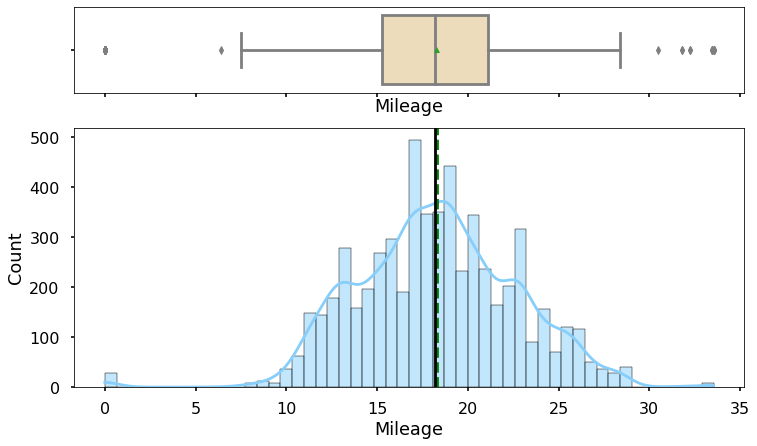

In [ ]:
Both_HistogramBoxplot(df,'Mileage')
print("Mean Mileage :", round(df['Mileage'].mean(),2))
print("Minimum Mileage", df['Mileage'].min())
print("Maximum Mileage", df['Mileage'].max())

* Mileage distribution is close to normal.
* There are a outliers in this variable.
* From boxplot, it is evident that about 75% of the vehicles have mileage less than 22. 

###Observation of Engine

Mean Engine : 18.28
Minimum Engine 624.0
Maximum Engine 5998.0


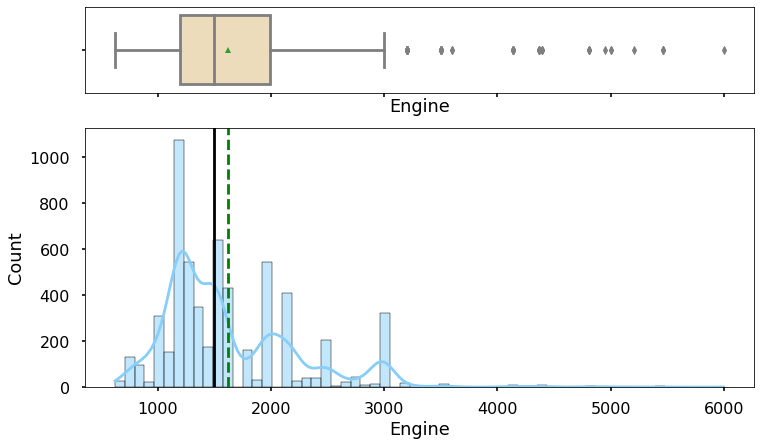

In [ ]:
Both_HistogramBoxplot(df,'Engine')
print("Mean Engine :", round(df['Mileage'].mean(),2))
print("Minimum Engine", df['Engine'].min())
print("Maximum Engine", df['Engine'].max())

* Engine distribution is right skewed.
* There are many outliers on the right side.

###Observation of Kilometers_Driven

Mean Kilometers_Driven : 58317.0
Minimum Kilometers_Driven 171
Maximum Kilometers_Driven 6500000


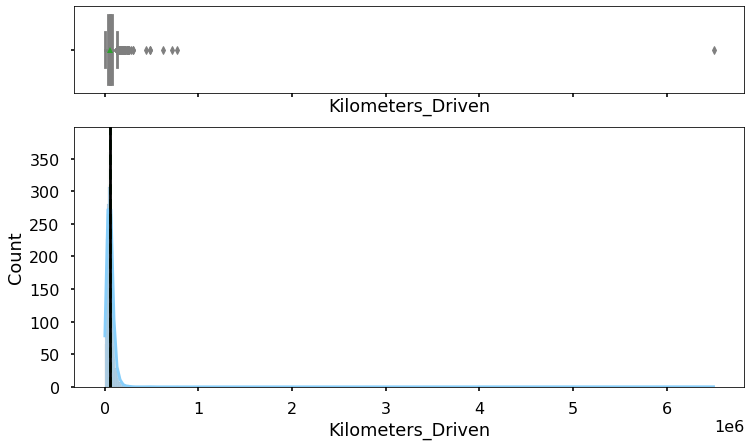

In [ ]:
Both_HistogramBoxplot(df,'Kilometers_Driven')
print("Mean Kilometers_Driven :", round(df['Kilometers_Driven'].mean(),2))
print("Minimum Kilometers_Driven", df['Kilometers_Driven'].min())
print("Maximum Kilometers_Driven", df['Kilometers_Driven'].max())

* Kilometer driven is highly skewed to right.
* There are a outliers in this variable. One value, also as evident in above box plot, is extreme. We will take care of this.


###Observation of Seats

Mean Seats : 5.28
Minimum Seats 2.0
Maximum Seats 10.0


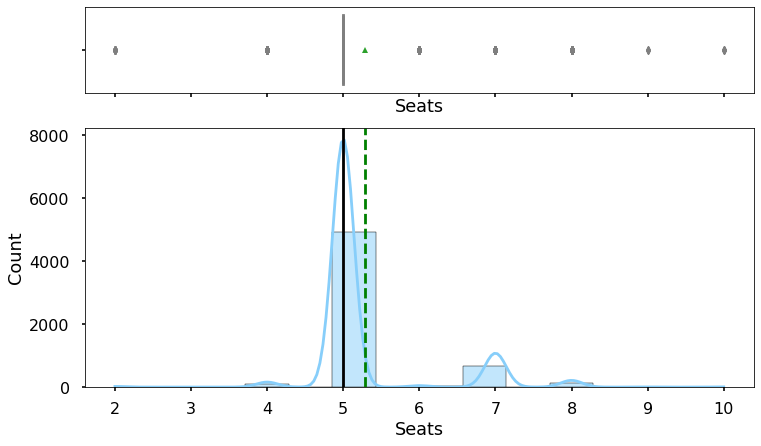

In [ ]:
Both_HistogramBoxplot(df,'Seats')
print("Mean Seats :", round(df['Seats'].mean(),2))
print("Minimum Seats", df['Seats'].min())
print("Maximum Seats", df['Seats'].max())

* Seat is a discrete variable.
* There are a outliers in this variable also.
* Most cars have 5 seats. 

###Observation of New_Price 

Mean New_Price : 21.64
Minimum New_Price 3.91
Maximum New_Price 375.0


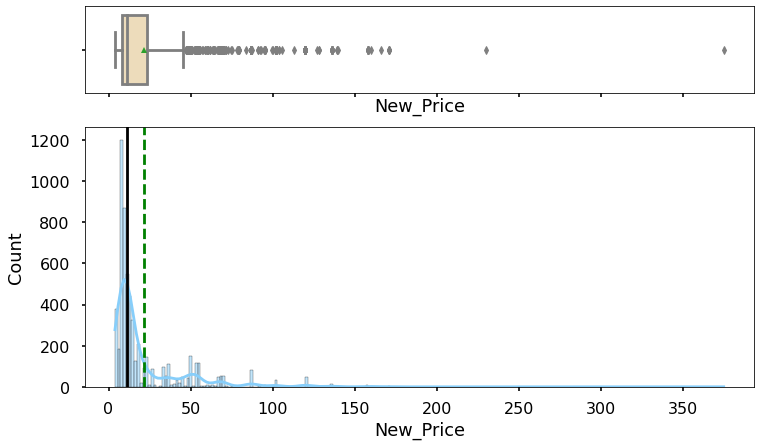

In [ ]:
Both_HistogramBoxplot(df,'New_Price')
print("Mean New_Price :", round(df['New_Price'].mean(),2))
print("Minimum New_Price", df['New_Price'].min())
print("Maximum New_Price", df['New_Price'].max())

* Price of new car is right skewed.
* There are many outliers in the right side of the distribution in this variable.
* From boxplot, it is evident that about 75% of the vehicles cost less than 22 lakh Indian Rupees. 

###Observation of Price (Used Cars)

Mean Price : 9.6
Minimum Price 0.44
Maximum Price 160.0


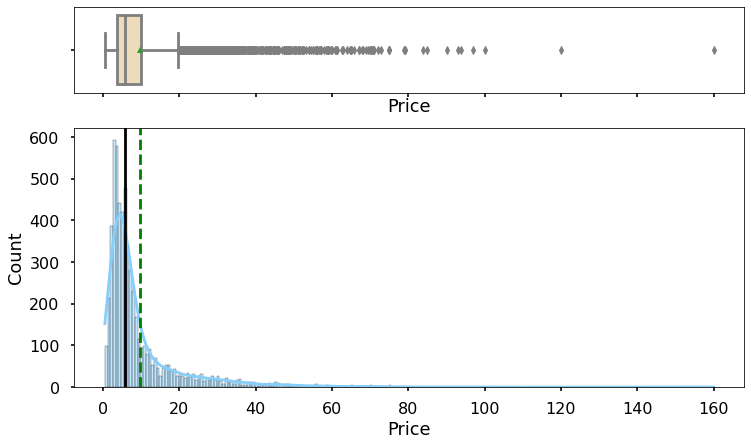

In [ ]:
Both_HistogramBoxplot(df,'Price')
print("Mean Price :", round(df['Price'].mean(),2))
print("Minimum Price", df['Price'].min())
print("Maximum Price", df['Price'].max())

* Price of used car is also right skewed.
* There are many outliers in this variable.
* From boxplot, it is evident that about 75% of the vehicles cost less than 10 lakh Indian Rupees. 

In [ ]:
# function below creates labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

###Observation of Location

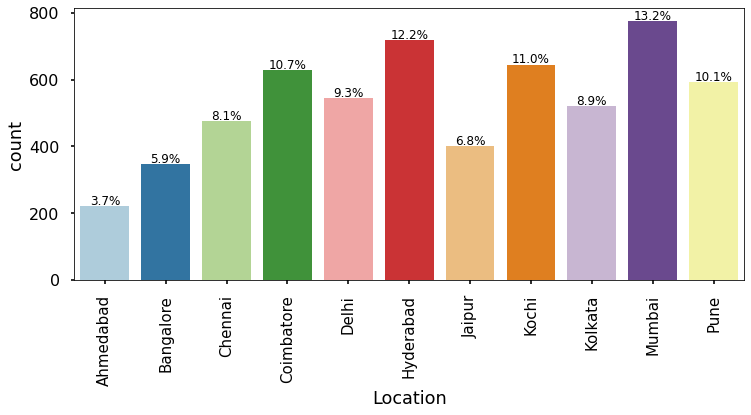

In [ ]:
labeled_barplot(df, "Location", perc=True)

* Among 11 cities reported in this data, the highest car count location (car available for purchase or sold) is Mumbai (13.2%). The least number of cars sold is in Ahmedabad (3.7%).


###Observation of Fuel_Type

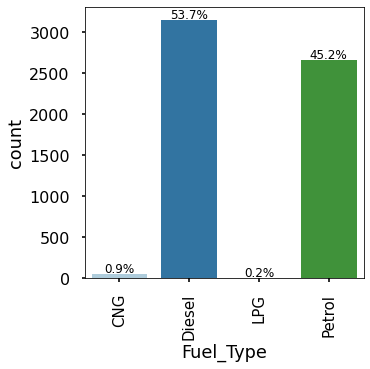

In [ ]:
labeled_barplot(df, "Fuel_Type", perc=True)

* Among 4 fuel type cars, Diesel is most popular (53.7%) and LPG is the least popular (0.2%). Petrol is second most popular (45.2%). 

---



In [ ]:
df['Name'].value_counts()

Maruti_Swift       327
Honda_City         265
Hyundai_i20        247
Hyundai_Verna      170
Toyota_Innova      164
                  ... 
Mahindra_XUV300      1
Porsche_Boxster      1
Nissan_Teana         1
Mini_Countryman      1
Jaguar_F             1
Name: Name, Length: 207, dtype: int64

###Observation of Name

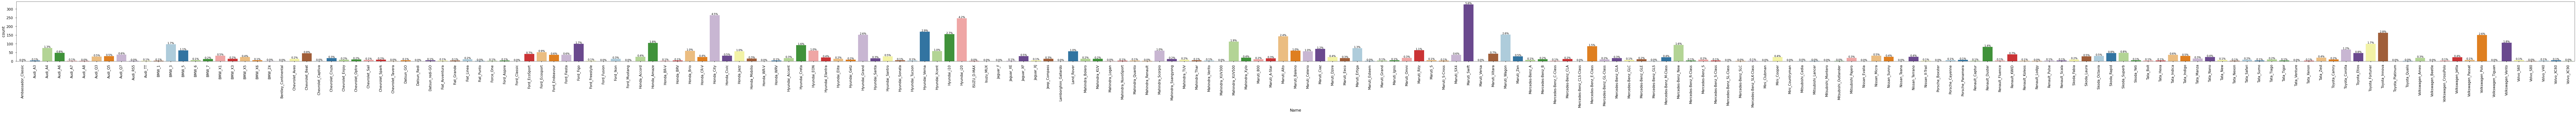

Maruti_Swift       327
Honda_City         265
Hyundai_i20        247
Hyundai_Verna      170
Toyota_Innova      164
                  ... 
Mahindra_XUV300      1
Porsche_Boxster      1
Nissan_Teana         1
Mini_Countryman      1
Jaguar_F             1
Name: Name, Length: 207, dtype: int64

In [ ]:
labeled_barplot(df, "Name", perc=True)
df['Name'].value_counts() # this counts the number of values in the column.

* Among all car brands, Maruti Swift is the most popular brand (5.6%, 327 cars). Then, Honda City (4.5%, 265 cars) and Hyundai_i20 (4.2%, 247 cars) are the second and the third popular cars. There are many cars that have caount 1, such as Jaguar_F, Mini_countryman, Nissan_Teana, Porsche_Boxster.


###Observation of Transmission

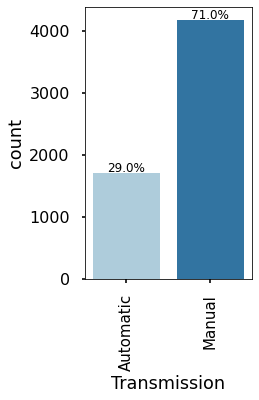

Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

In [ ]:
labeled_barplot(df, "Transmission", perc=True)
df['Transmission'].value_counts() # this counts the number of values in the column.

* There are two transmission types. Manual is more popular (71%) than automatic (29%).

###Observation of Owner_Type

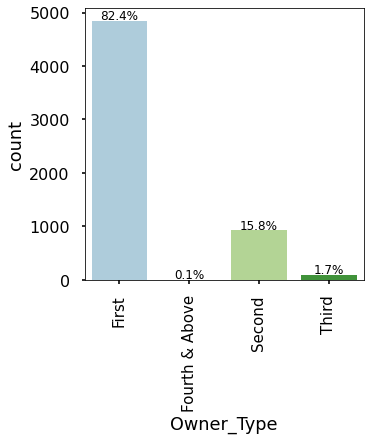

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

In [ ]:
labeled_barplot(df, "Owner_Type", perc=True)
df['Owner_Type'].value_counts() # this counts the number of values in the column.

* Most vehicles are first owner type (82.4%). Then, 15.8% are second owner type. A very few vehicles are fourth and above (0.1%), which is only 7 cars.

##Bivariate Analysis

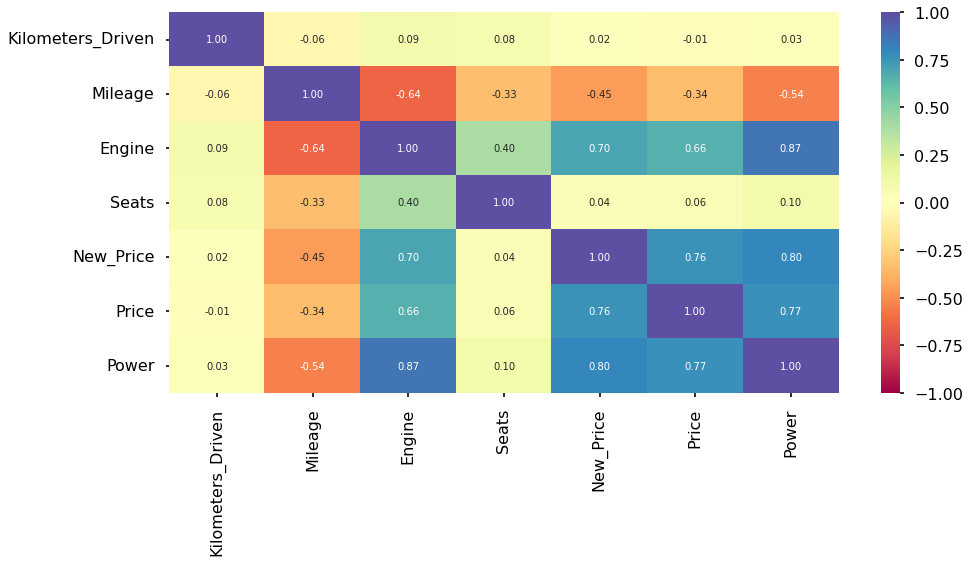

In [ ]:
# Include only numeric variables
select_var =  ['Kilometers_Driven','Mileage','Engine','Seats','New_Price', 'Price', 'Power'] # select variable column
corr = df[select_var].corr()
# display heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


* Price is highly correlated with New_price (0.76), customer will pay higher for expensive car.
* Price of car is higher for higher CC engine cars. This is true for both used and new car.
* Mileage correlates negatively with Engine. This implies that a car with higher CC engine has lower mileage. 
* Kilometer_driven correlates poorly with any other variable, this implies that it has small association with mileage, price and engine.
* Engine and Power are highly correlated. This is obvious because higher engine (CC) has higher power (bhp)


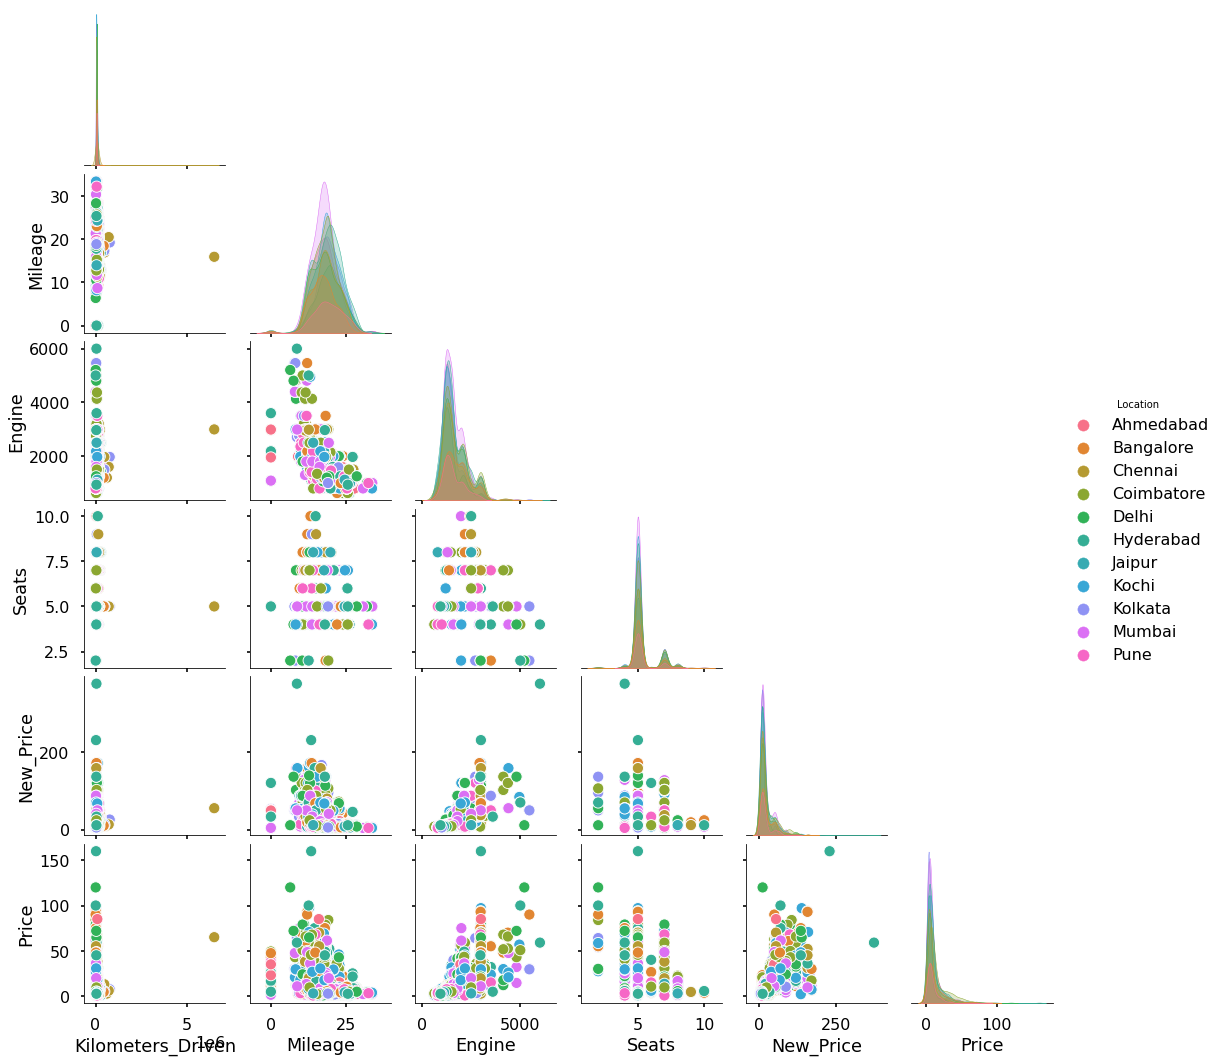

In [ ]:
#plot scatterplot categorised by Locations
sns.pairplot(data=df, vars=['Kilometers_Driven','Mileage','Engine','Seats','New_Price', 'Price'], hue='Location', corner=True);

* Mileage reduces with the increase of Engine power for all cities
* Higher power Engine car cost higher.


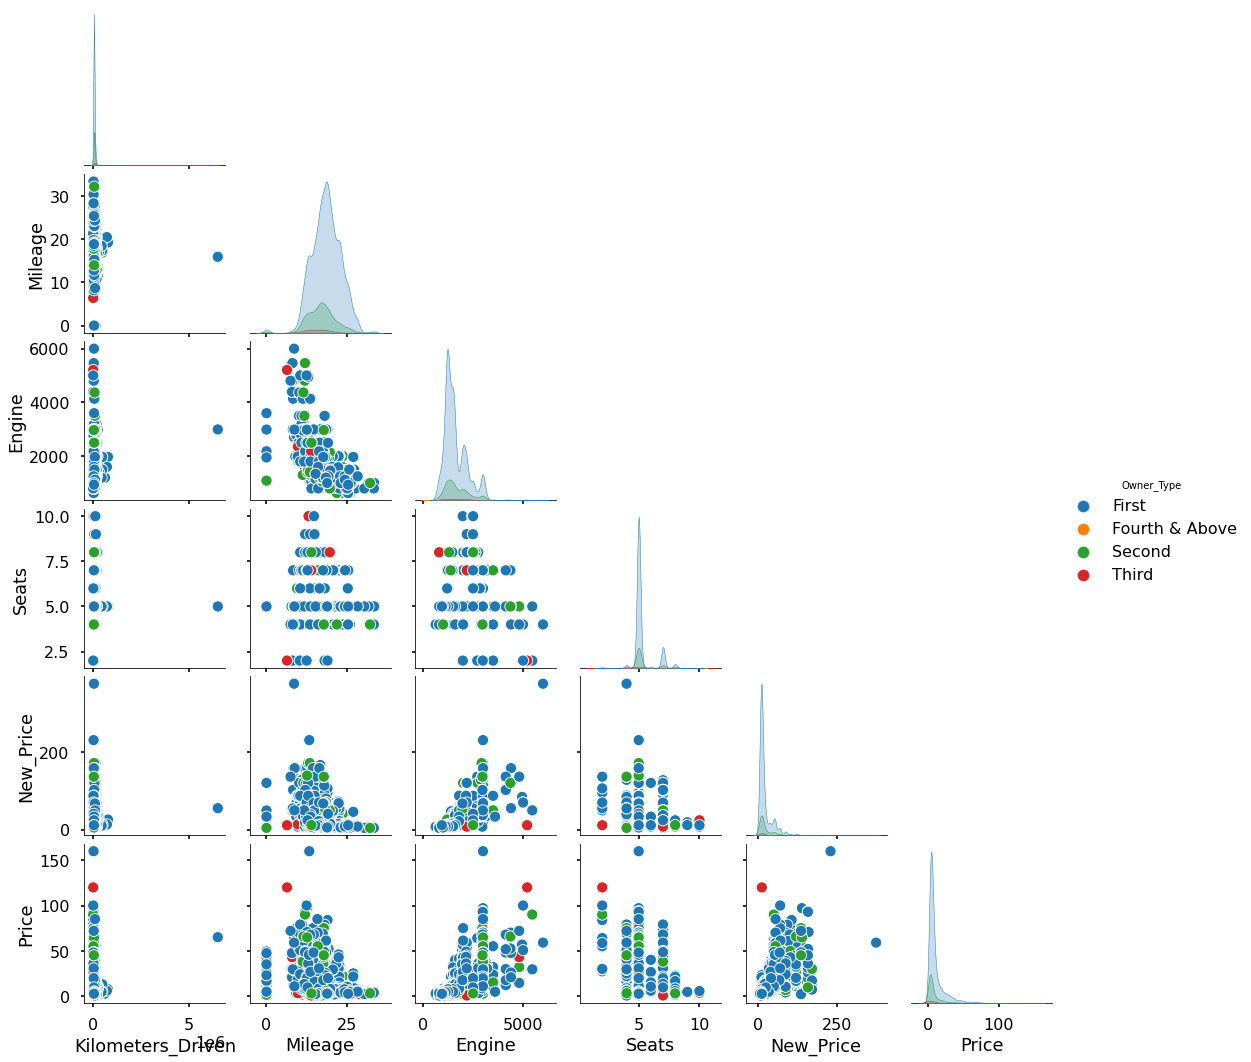

In [ ]:
#plot scatterplot categorised by Owner_Type
sns.pairplot(data=df, vars=['Kilometers_Driven','Mileage','Engine','Seats','New_Price', 'Price'], hue='Owner_Type', corner=True);

* Same conlcusion as above but for various Owner_Type.

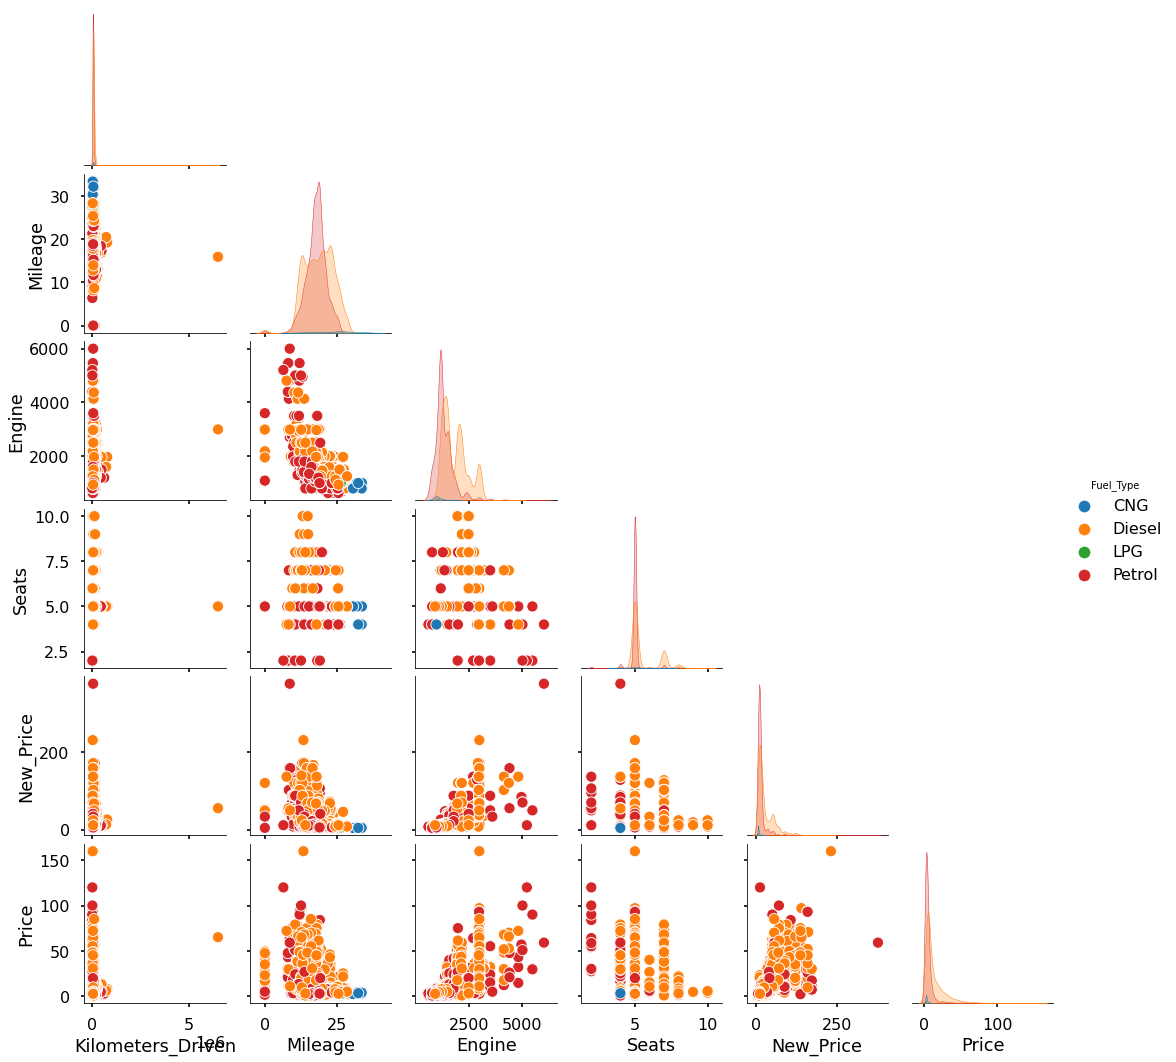

In [ ]:
#plot scatterplot categorised by Fuel_Type
sns.pairplot(data=df, vars=['Kilometers_Driven','Mileage','Engine','Seats','New_Price', 'Price'], hue='Fuel_Type', corner=True);


* Same conclusion as above but for Fuel_Type

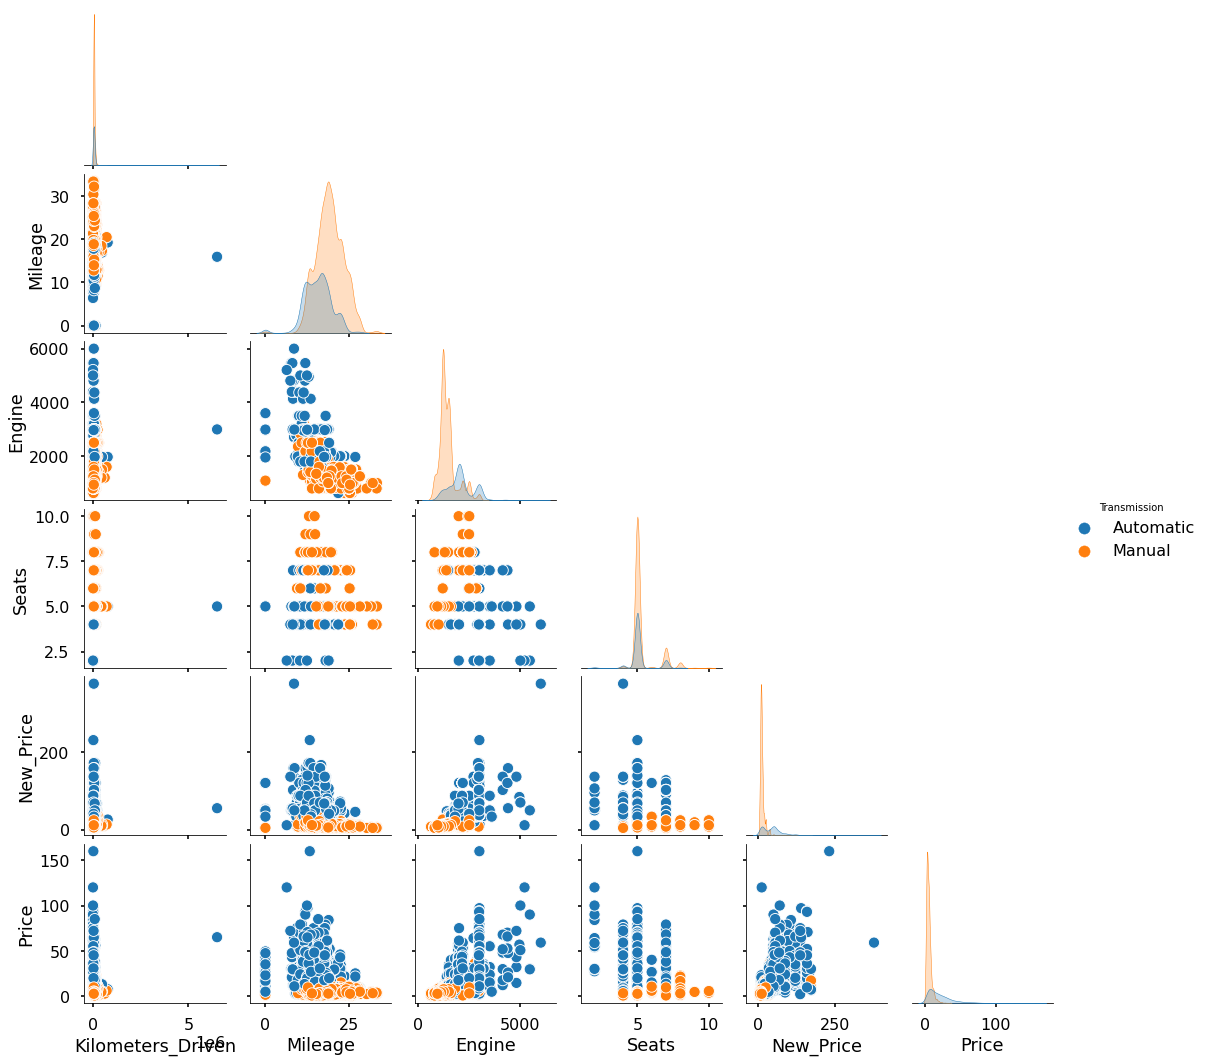

In [ ]:
#plot scatterplot categorised by Transmission
sns.pairplot(data=df, vars=['Kilometers_Driven','Mileage','Engine','Seats','New_Price', 'Price'], hue='Transmission', corner=True);


* Manual Cars have lower Engine CC compared to Manual cars.
* Manual cars cost lower than Automatic cars for the same Mileage.

###Transmission vs Price

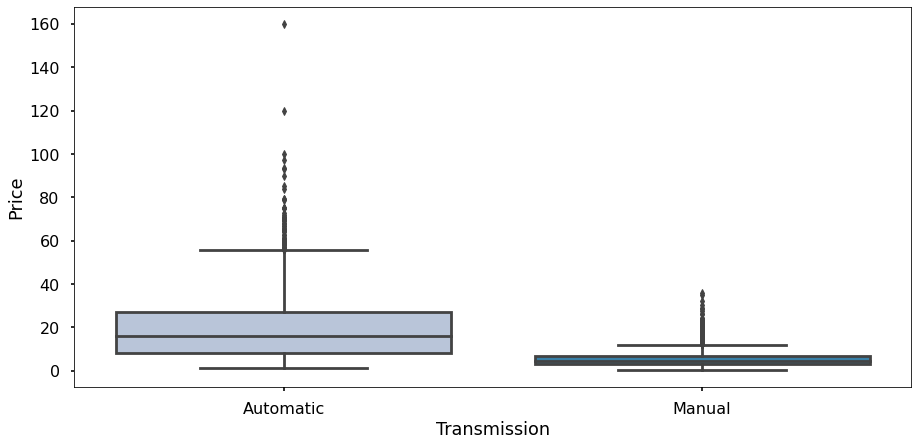

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = df["Transmission"], y = df["Price"],palette="PuBu")
plt.show()

* Automatic cars cost much higher than cars with manual transmission.
* customer with higher income prefer Automatic cars.
* There is a huge variability in Automatic car price than that of manual car.

###Owner_Type vs Price

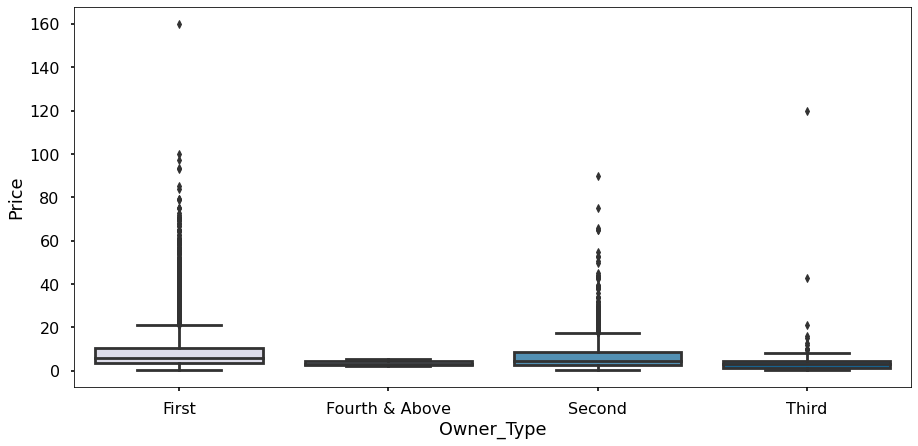

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = df["Owner_Type"], y = df["Price"],palette="PuBu")
plt.show()

* First owner vehicle sells for highest price than the other. In one case the third hand owner car was also sold in much higher price than second and most first hand owner cars.

###Fuel_Type vs Price

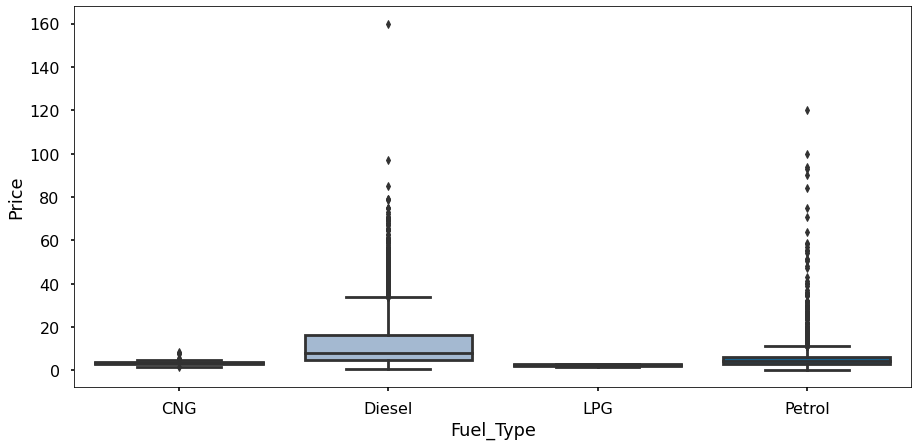

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = df["Fuel_Type"], y = df["Price"],palette="PuBu")
plt.show()

* There are many outliers in Petrol cars. Most Petrol cars are less expensive than Diesel cars (see the thickness of the box).
* Mostly Diesel and Petrol cars are popular and CNG and LPG are relatively less.

###Seats vs Price

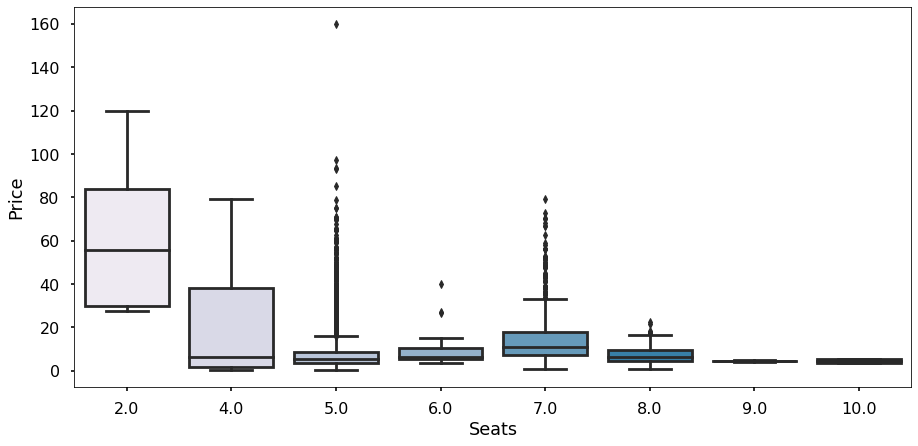

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = df["Seats"], y = df["Price"],palette="PuBu")
plt.show()

* Two seater is relatively expensive than other (more than 20 - 120 INR), and there is a wide variation in price of the two seater car (as evident by the box size). Five seater car has many outliers, and so does the seven seater car. The most expensive car there is a five seater car (see the outlier). Customers who want to pay very less prefer 6,8,9,10 seater cars.

###Transmission vs Fuel_Type

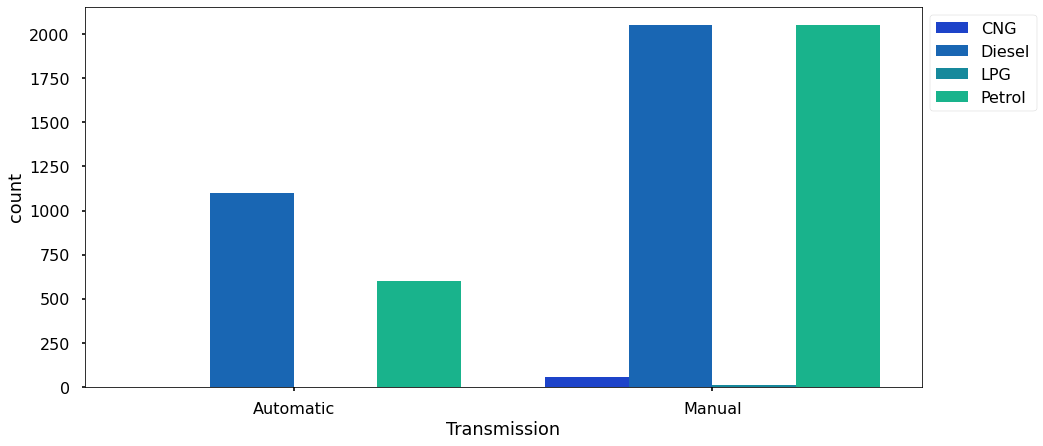

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data = df, x = df["Transmission"],hue=df["Fuel_Type"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Most cars are Manual Diesel and Petrol.
* Automatic cars are relatively less popular.

###Owner_Type vs Year

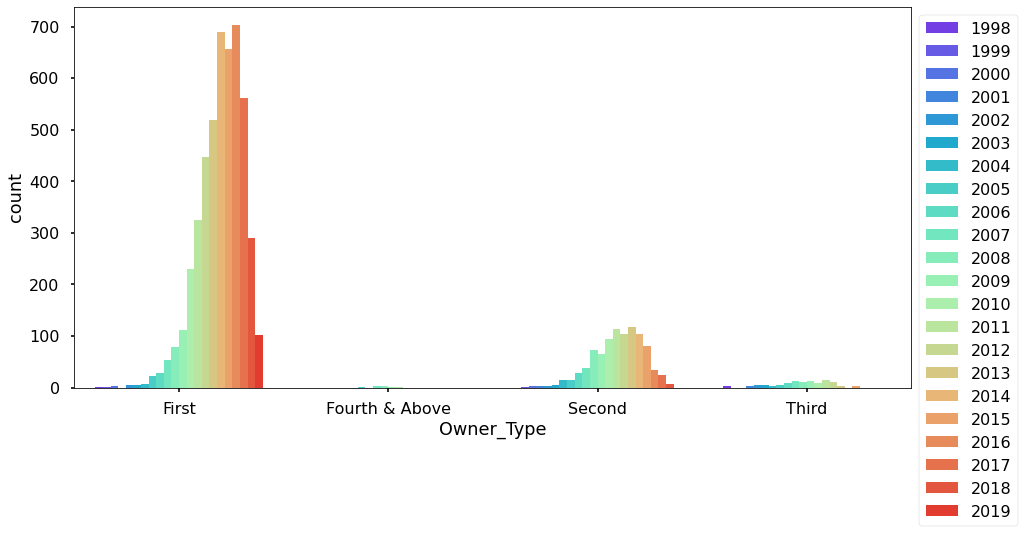

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data = df, x = df["Owner_Type"],hue=df["Year"],palette='rainbow')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Most cars were sold (first owner type) in the year 2016. After that, the sale of new car is decreasing.
* In general years from 2012-2014 were best years for second hand cars. They were sold most in those years. The sale is reducing continuously after 2014 up to 2019.

###Transmission vs Location

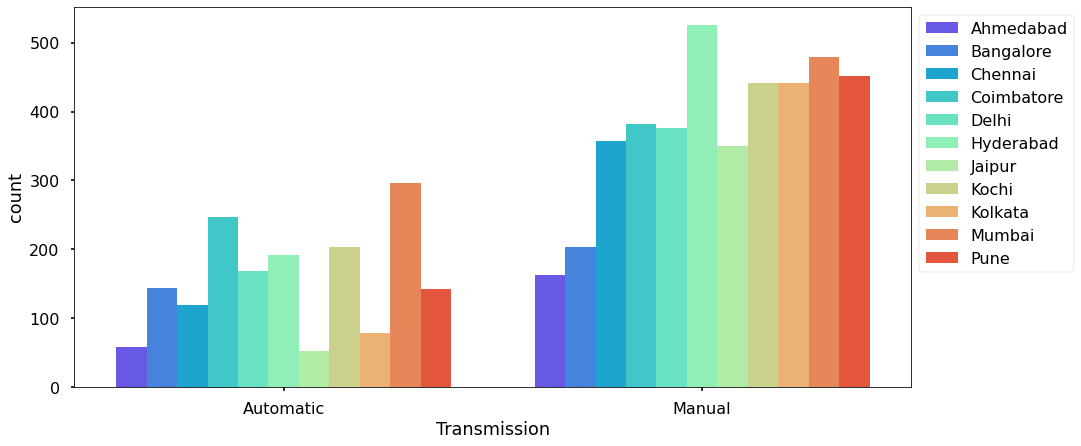

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data = df, x = df["Transmission"],hue=df["Location"],palette='rainbow')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Manual cars are most popular in Hyderabad and least popular in Ahmedabad
*Automatic cars are popular in Mumbai and least in Ahmedabad.

###Owner_Type vs Location

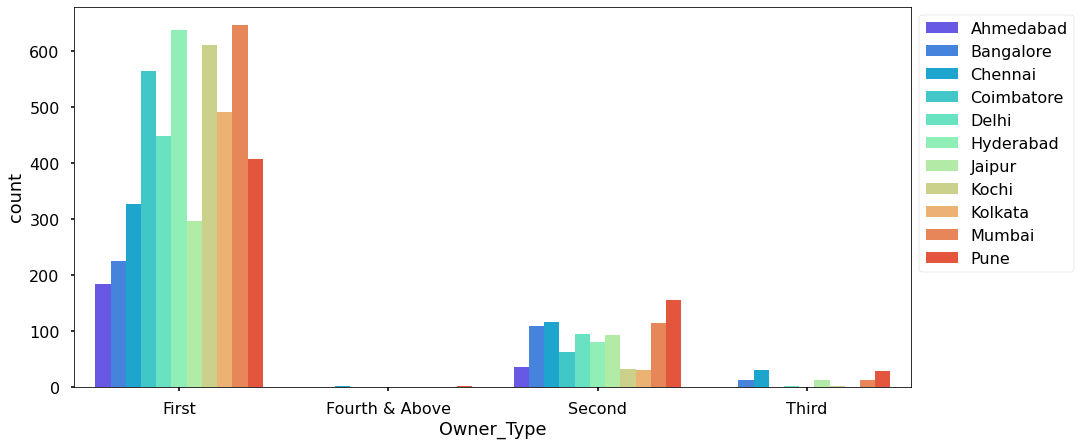

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data = df, x = df["Owner_Type"],hue=df["Location"],palette='rainbow')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Most cars in Mumbai and Hyderabad are first owner type
* Second owner car are most popular in Pune/ Mumbai and then Banglore and Chennai.

###Fuel_Type vs Location

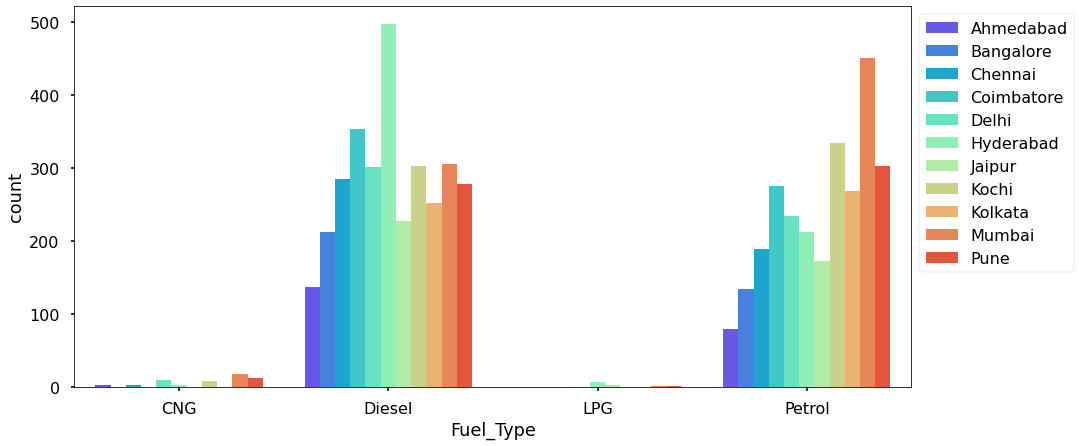

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data = df, x = df["Fuel_Type"],hue=df["Location"],palette='rainbow')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Diesel cars are most popular in Hyderabad whereas Petrol cars are popular in Mumbai.

###Mileage vs Price

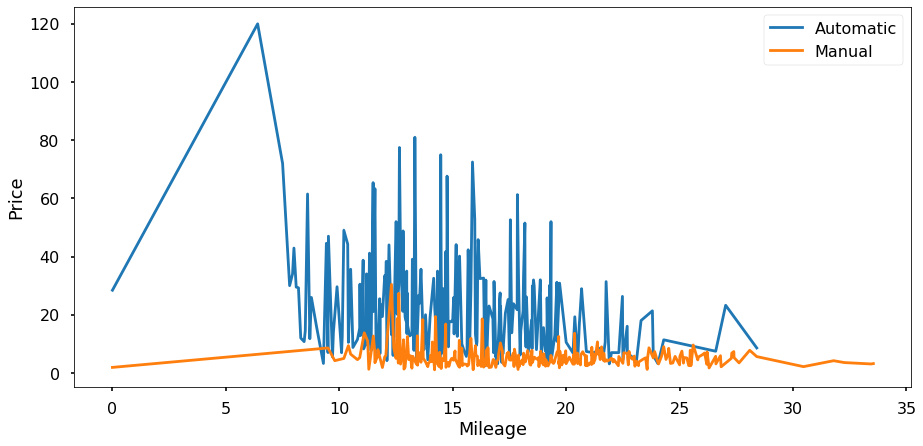

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data = df, x = df["Mileage"], y = df["Price"],hue=df["Transmission"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* For all mileages Automatic cars are expensive than manual cars.

###Seats vs Price by Owner_Type

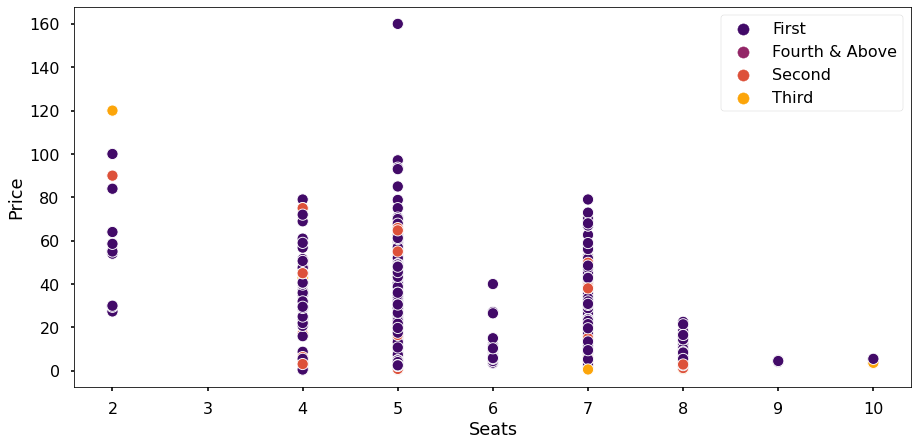

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = df, x = df["Seats"], y = df["Price"],hue=df["Owner_Type"],ci=0,palette="inferno")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

*Third owner type car costs relatively less if it has lower Engine power, but with higher engine powers, third owner type cars can be more expensive as first and second

* High mileage expensive cars are popular in Hyderabad.

###Seats vs Price by Location


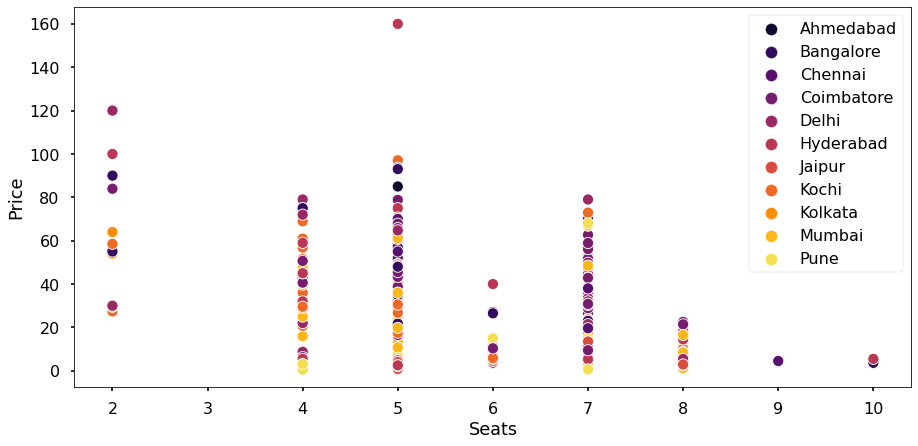

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = df, x = df["Seats"], y = df["Price"],hue=df["Location"],ci=0,palette="inferno")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Very expensive 2 -3 seater cars are popular in Hyderabad, Banglore, Coimbatore, Delhi, Kolkota, and Kochi but NOT in Pune, Mumbai, Jaipur, Chennai.

###New_price vs Price

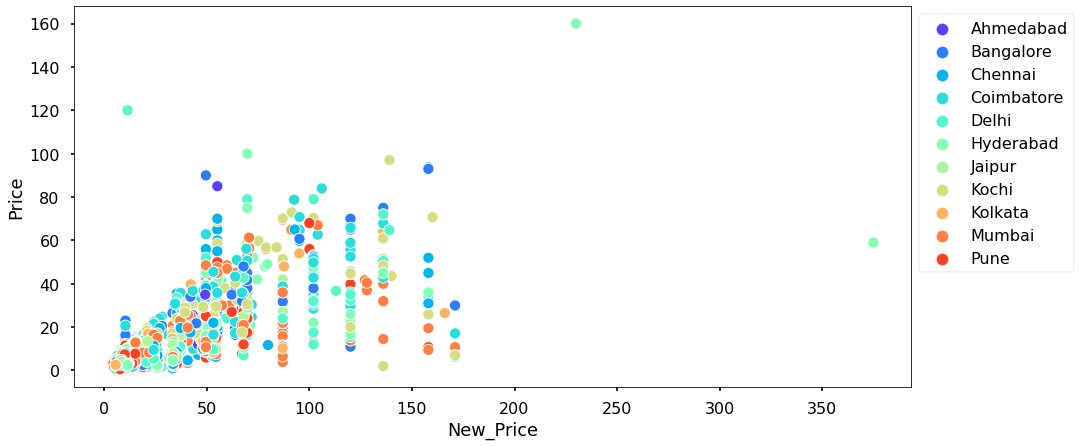

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = df, x = df["New_Price"], y = df["Price"],hue=df["Location"],ci=0,palette="rainbow")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Price of used car can also be predicted based on the price of the New_car. An expensive new car sells expensive even after its use.

#Conclusion:

*	Location has 11 types of regions or cities. Among all cities, Mumbai is the most frequent location, meaning most cars are sold there.
*	There are four Fuel Type cars, and the Diesel is the most popular. 
*	There are two Transmission types, Manual is the most popular (4170 are manual out of 5872 cars).
*	Most owners are first category. There are four classes of owners, and the first is the most popular (4839 are first owner out of 5872).
*	From boxplot, it is evident that about 75% of the vehicles have mileage less than 22.
*	Most, 75%, vehicles cost less than 22 lakh Indian Rupees.
*	Among all car brands, Maruti Swift is the most popular brand (5.6%, 327 cars)* Then, Honda City (4.5%, 265 cars) and Hyundai_i20 (4.2%, 247 cars) are the second and the third popular cars. 
*	Price for used car is highly correlated with price of the car when it is new (0.76), this implies that customer will pay higher for expensive car.
*	Price of car is higher for higher CC engine cars. This is true for both used and new car.
*	Mileage correlates negatively with Engine. This implies that a car with higher CC engine has lower mileage. 
*	Engine and Power are highly correlated. This is obvious because higher engine (CC) has higher power (bhp).
*	Manual cars cost less than automatic car for the same mileage.
*	Customer with higher income prefer Automatic cars.
*	First owner vehicle sells for highest price than the other. In one case the third hand owner car was also sold in much higher price than second and most first-hand owner cars.
*	Petrol cars are less expensive than Diesel cars.
*	Diesel and Petrol cars are more popular than CNG and LPG cars.
*	Most cars were sold in 2016 and after than sales has been decreasing. Years from 2012-2014 were best for car sales.
*	Most cars in Mumbai and Hyderabad are first owner type
*	Second owner car are most popular in Pune/ Mumbai and then Banglore and Chennai.
*	Diesel cars are most popular in Hyderabad whereas Petrol cars are popular in Mumbai.
*	High mileage expensive cars are popular in Hyderabad.
*	Very expensive 2 -3 seater cars are popular in Hyderabad, Banglore, Coimbatore, Delhi, Kolkota, and Kochi but NOT in Pune, Mumbai, Jaipur, Chennai.


#Recommendations:

* Used car sales has been reducing in recent years. In order to reduce the overhead cost, the business may consider closing centers in locations with low sales, such as Ahmedabad and also consider increasing sales centers in locations with high sale counts, such as Mumbai and Hyderabad.

* Consider opening centers at Mumbai and Hyderabad with more automatic transmission cars.

* Because used cars are more pupular in Mumbai and Pune, consider opening used car sales center in Pune and Mumbai than in Banglore and Chennai. Also, expensive new car sells for higher price as used car also. Depending upon business priority, you may consider opening centers in Mumbai and Pune for expensive used car.

* Consider transferring Diesel cars to Hyderabad and Petrol cars to Mumbai as Diesel cars are popular in Hyderabad and Petrol cars are popular in Mumbai.

* If there are 2-3 seater cars in inventory, consider selling them in Hyderabad, Banglore Delhi, Kolkota, and Kochi  but not in Mumbai and Pune.

##Some Feature Engineering ("I have done some feature engineering below also")

In [ ]:
#Lets delete S.No, we dont need that.
df = df.drop('S.No.', axis=1)

* We do not need this feature that is in the data. Lets delete this. I read somewhere that deleting Serial No, may not be considered a true feature engineering task, but someone consider it feature engineering. In anyways, lets just delete this column.

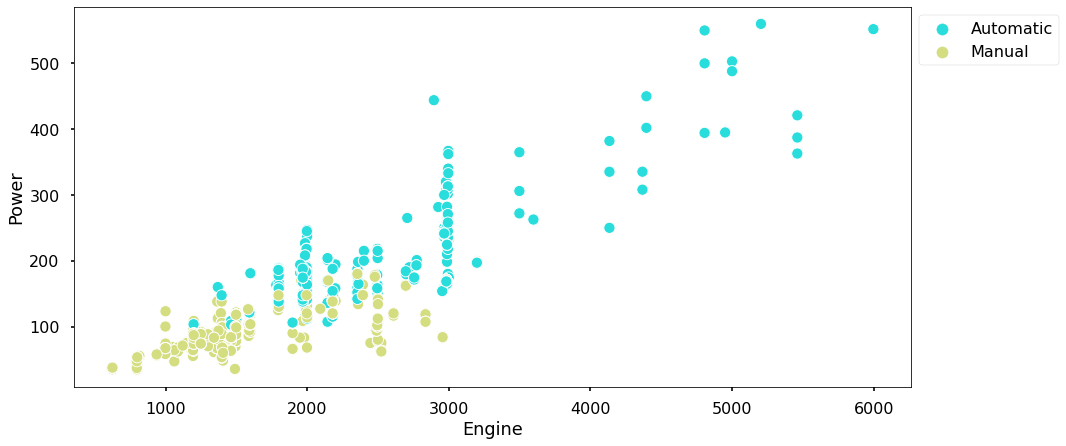

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = df, x = df["Engine"], y = df["Power"],hue=df["Transmission"],ci=0,palette="rainbow")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Engine (displacement volume in CC) is linearly related to Power (bhp), look at how the dots are lined up along 45-degree angle between the two axes. Correlation between the two is 0.87 (see the heatmap above). So, lets get rid of Power. 

###Reducing dimension (deleting column, "Power", "Year", "Name"). We are not including Year/ Name in our model. So delete those columns.

In [ ]:
df = df.drop('Year', axis=1)
df = df.drop('Name', axis=1)
df = df.drop('Power', axis=1)

#Lets investigate into outliers.

Lets see the variables that have outliers.

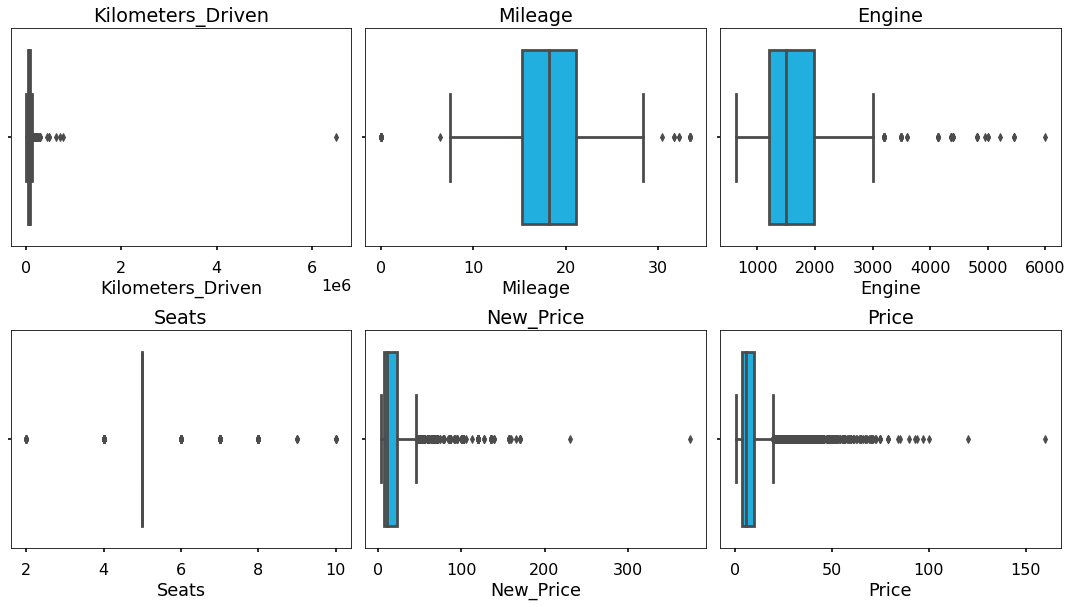

In [ ]:
selected_columns = ['Kilometers_Driven','Mileage','Engine','Seats','New_Price', 'Price']#Select columns to plot
plt.figure(figsize=(15, 12)) # Figure size

for i, variable in enumerate(selected_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=variable, color = "deepskyblue")
    plt.tight_layout()
    plt.title(variable)

plt.show()

Lets first see rge quartiles. It could be very tricky to call any value an outlier. We really have to be super careful here. First lets divide the data into quantile points and see if it makes sense to call any value an outlier.

In [ ]:
quartiles = np.quantile(df['Kilometers_Driven'][df['Kilometers_Driven'].notnull()],[0.25, 0.75]) # this is finding the qartiles.
power_4iqr = 4 * (quartiles[1]-quartiles[0])
print(f' Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
outlier_powers = df.loc[np.abs(df['Kilometers_Driven']-df['Kilometers_Driven'].median())> power_4iqr, 'Kilometers_Driven']
outlier_powers

 Q1 = 33422.5, Q3 = 72402.75, 4*IQR = 155921.0


29       262000
77       230000
181      216000
340      775000
358      620000
838      215000
1101     248000
1442     231673
1528     299322
1766     220000
1846     255000
1860     720000
1975     282000
2328    6500000
2346     234000
2823     480000
2988     240000
3092     480000
3649     300000
3713     232000
3894     250000
4491     445000
4719     250000
4792     242000
5800     210000
5834     250000
Name: Kilometers_Driven, dtype: int64

If I take 4* IQR, then, I will be loosing a lot of points. These do not look outliers. Lets make the selection criteria even more conservative by making it 20 times IQR, because the one point that has million value looks outlier here.

In [ ]:
quartiles = np.quantile(df['Kilometers_Driven'][df['Kilometers_Driven'].notnull()],[0.25, 0.75]) # this is finding the qartiles.
power_20iqr = 20 * (quartiles[1]-quartiles[0])
print(f' Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_20iqr}')
outlier_powers = df.loc[np.abs(df['Kilometers_Driven']-df['Kilometers_Driven'].median())> power_20iqr, 'Kilometers_Driven']
outlier_powers

 Q1 = 33422.5, Q3 = 72402.75, 4*IQR = 779605.0


2328    6500000
Name: Kilometers_Driven, dtype: int64

Lets make that point NA and delete that outlier from Kilometers_Driven column.

In [ ]:
df.loc[np.abs(df['Kilometers_Driven']-df['Kilometers_Driven'].median())> power_20iqr, 'Kilometers_Driven'] = np.nan

Lets drop the NA from the data.

In [ ]:
# checking for missing values and which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

Kilometers_Driven    1
Location             0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Seats                0
New_Price            0
Price                0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
# checking for missing values and which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

Location             0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Seats                0
New_Price            0
Price                0
dtype: int64

The other variables look fine. There are many outliers but those do not look suspicious.

#Transforming the variables for skewness

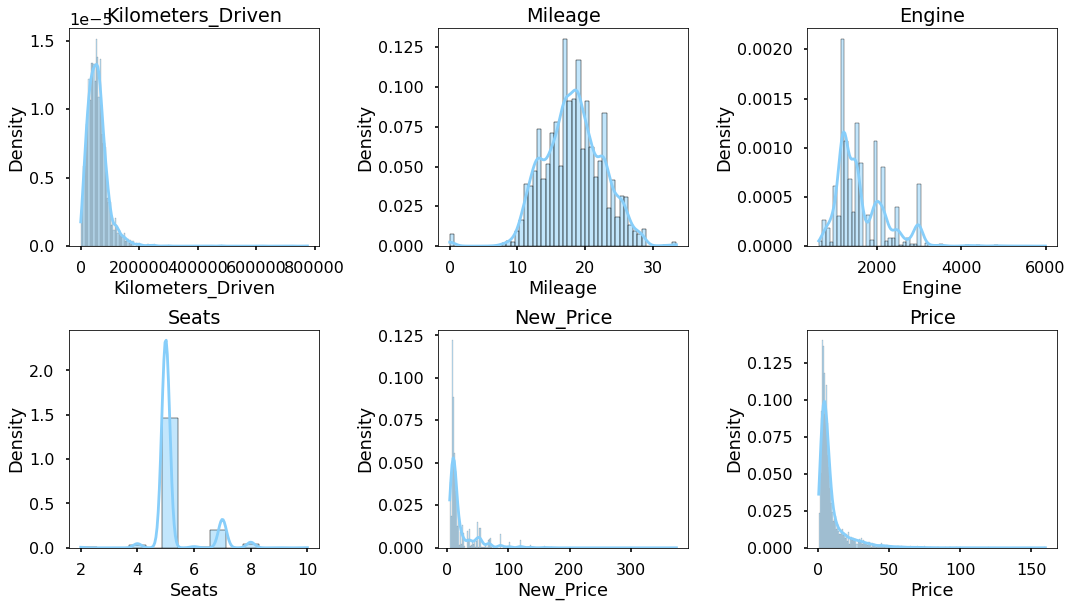

In [ ]:
#Lets select columns we want to plot.
selected_columns = ['Kilometers_Driven','Mileage','Engine','Seats','New_Price', 'Price'] #Select columns to plot
plt.figure(figsize=(15, 12)) # Figure size

for i, variable in enumerate(selected_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df,x=variable,stat='density',color = "lightskyblue",kde=True) # kde plots the density
    plt.tight_layout()
    plt.title(variable)

plt.show()

We will use log transformation to all except Mileage and Seats, as they are not skewed. We also do not transform "Price" because we want to predict this, this is our output.

In [ ]:
#Lets create a copy of the dataframe
df3 = df.copy()

In [ ]:
#Lets drop the Mileage and Seats columns as they are not skewed.
df3 = df3.drop('Mileage', axis=1)

In [ ]:
df3 = df3.drop('Seats', axis=1)

In [ ]:
df3 = df3.drop('Price', axis=1)

In [ ]:
selected_columns2 = ['Kilometers_Driven','Engine','New_Price']
for col in selected_columns2:
  df3[col + "_log"] = np.log(df3[col] + 1) # doing the log transformation
#drop the original columns
df3.drop(selected_columns2, axis = 1, inplace = True)
df3.head()

,Location,Fuel_Type,Transmission,Owner_Type,Kilometers_Driven_log,Engine_log,New_Price_log
0,Mumbai,CNG,Manual,First,11.184,6.907,1.873
1,Pune,Diesel,Manual,First,10.621,7.367,2.837
2,Chennai,Petrol,Manual,First,10.736,7.090,2.263
3,Chennai,Diesel,Manual,First,11.374,7.130,2.507
4,Coimbatore,Diesel,Automatic,Second,10.613,7.585,3.992


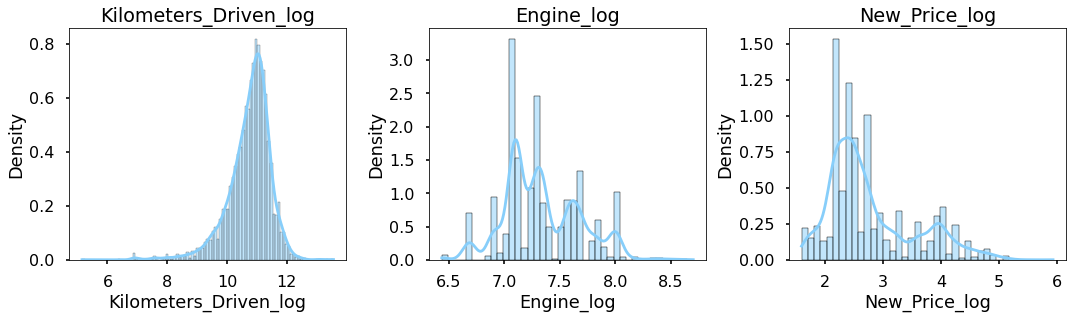

In [ ]:
#Lets select columns we want to plot.
selected_columns3 = ['Kilometers_Driven_log','Engine_log','New_Price_log'] #Select columns to plot
plt.figure(figsize=(15, 12)) # Figure size

for i, variable in enumerate(selected_columns3):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df3,x=variable,stat='density',color = "lightskyblue",kde=True) # kde plots the density
    plt.tight_layout()
    plt.title(variable)

plt.show()

#Great the transformation looks good, and the distribution looks fairly normal.

Lets see the correlation among the predictor variables.

In [ ]:
df3.head(2)

,Location,Fuel_Type,Transmission,Owner_Type,Kilometers_Driven_log,Engine_log,New_Price_log
0,Mumbai,CNG,Manual,First,11.184,6.907,1.873
1,Pune,Diesel,Manual,First,10.621,7.367,2.837


<Figure size 1080x504 with 0 Axes>

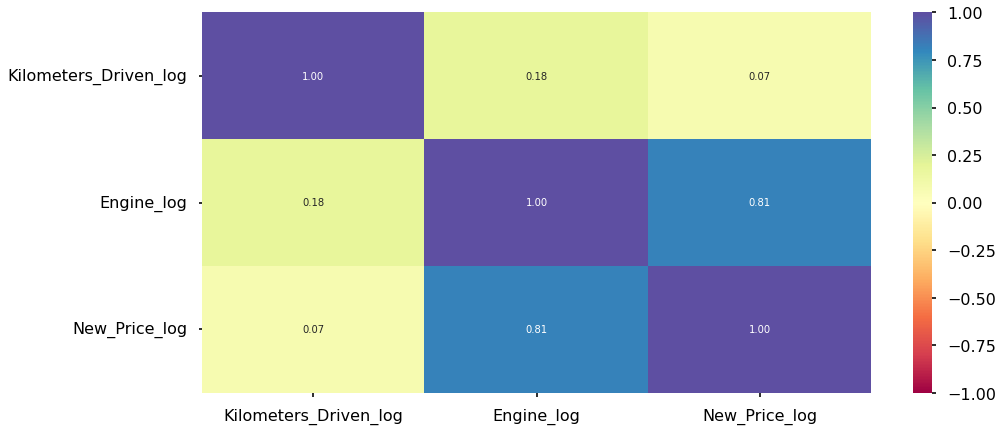

In [ ]:
plt.figure(figsize=(15,7))
# Include only numeric variables
select_var4 =  ['Kilometers_Driven_log','Engine_log','New_Price_log'] # select variable column
corr = df3[select_var4].corr()
# display heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Notice that Engine_log and New_Price_log are highly correlated. Usually, I have seen people removing variables when their correlation is greater than 0.7, if their purpose of building model is to understand the causal relationship among the variables. In this case, however, we are interested in predicting the price of used car, so we can keep both of these variables. This is because the purpose here is to make prediction not to explore more on the causality.

#Standardizing continuous variables.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
result1 = df.copy()

In [ ]:
result2 = df3.copy()

In [ ]:
result2.shape

(5871, 7)

In [ ]:
result1.reset_index(drop=True)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,New_Price,Price
0,Mumbai,72000.000,CNG,Manual,First,26.600,998.000,5.000,5.510,1.750
1,Pune,41000.000,Diesel,Manual,First,19.670,1582.000,5.000,16.060,12.500
2,Chennai,46000.000,Petrol,Manual,First,18.200,1199.000,5.000,8.610,4.500
3,Chennai,87000.000,Diesel,Manual,First,20.770,1248.000,7.000,11.270,6.000
4,Coimbatore,40670.000,Diesel,Automatic,Second,15.200,1968.000,5.000,53.140,17.740
...,...,...,...,...,...,...,...,...,...,...
5866,Delhi,27365.000,Diesel,Manual,First,28.400,1248.000,5.000,7.880,4.750
5867,Jaipur,100000.000,Diesel,Manual,First,24.400,1120.000,5.000,8.230,4.000
5868,Jaipur,55000.000,Diesel,Manual,Second,14.000,2498.000,8.000,11.670,2.900
5869,Kolkata,46000.000,Petrol,Manual,First,18.900,998.000,5.000,5.510,2.650


In [ ]:
result1 = result1.drop('Kilometers_Driven', axis=1)

In [ ]:
result1 = result1.drop('Engine', axis=1)

In [ ]:
result1 = result1.drop('New_Price', axis=1)

In [ ]:
result1.shape

(5871, 7)

In [ ]:
result2.shape

(5871, 7)

In [ ]:
result2.reset_index(drop=True)

,Location,Fuel_Type,Transmission,Owner_Type,Kilometers_Driven_log,Engine_log,New_Price_log
0,Mumbai,CNG,Manual,First,11.184,6.907,1.873
1,Pune,Diesel,Manual,First,10.621,7.367,2.837
2,Chennai,Petrol,Manual,First,10.736,7.090,2.263
3,Chennai,Diesel,Manual,First,11.374,7.130,2.507
4,Coimbatore,Diesel,Automatic,Second,10.613,7.585,3.992
...,...,...,...,...,...,...,...
5866,Delhi,Diesel,Manual,First,10.217,7.130,2.184
5867,Jaipur,Diesel,Manual,First,11.513,7.022,2.222
5868,Jaipur,Diesel,Manual,Second,10.915,7.824,2.539
5869,Kolkata,Petrol,Manual,First,10.736,6.907,1.873


In [ ]:
result2.shape

(5871, 7)

In [ ]:
result = pd.concat([result1, result2], axis=1, join='inner')

In [ ]:
result.shape

(5871, 14)

In [ ]:
result = result.reset_index().T.drop_duplicates().T

In [ ]:
result.shape

(5871, 11)

In [ ]:
result = result.reset_index(drop=True)

In [ ]:
result = result.drop('index', axis=1)

In [ ]:
result.shape

(5871, 10)

##Lets use minmax scalar standardization. It will scale variables between 0 and 1. We could also do standardscalar that standardizes based on standard deviation.

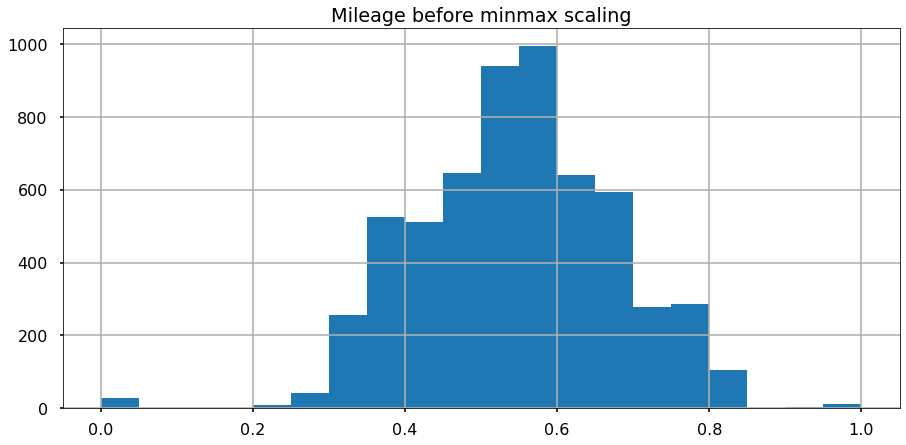

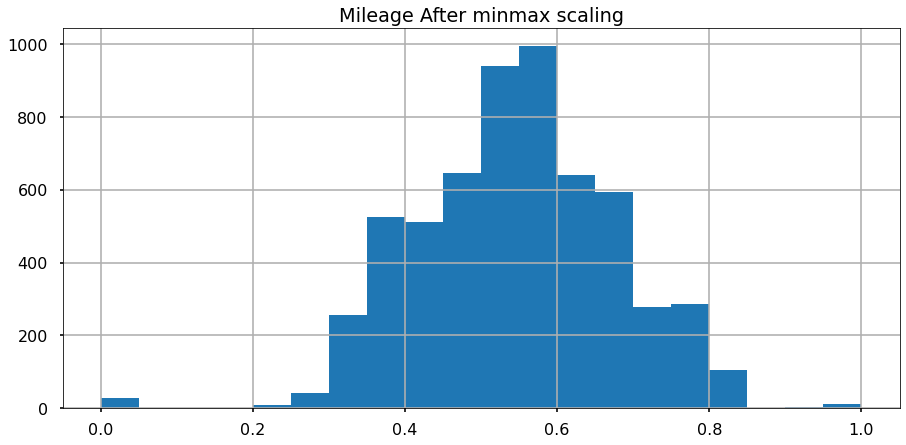

In [ ]:
plt.figure(figsize=(15,7))
result['Mileage'].hist(bins=20)
plt.title('Mileage before minmax scaling')
plt.show()

result [['Mileage','Seats','Kilometers_Driven_log','Engine_log','New_Price_log']] = MinMaxScaler().fit_transform(result[['Mileage','Seats','Kilometers_Driven_log','Engine_log','New_Price_log']])
plt.figure(figsize=(15,7))
result['Mileage'].hist(bins=20)
plt.title('Mileage After minmax scaling')
plt.show()


## YAY! Look at how the distribution, it did not change even after scaling. So, we are good to move forward.

#Encoding categorical variables as numbers (1 and 0). 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
result5 = result.copy()

In [ ]:
result5.shape

(5871, 10)

In [ ]:
result11 = pd.get_dummies(result5['Location'], drop_first=True)

In [ ]:
result12 = pd.get_dummies(result5['Fuel_Type'], drop_first=True)
result13 = pd.get_dummies(result5['Transmission'], drop_first=True)
result14 = pd.get_dummies(result5['Owner_Type'], drop_first=True)

In [ ]:
result20 = pd.concat([result5,result11, result12, result13, result14], axis=1, join='inner')

In [ ]:
result20.shape

(5871, 27)

In [ ]:
result30 = result20.reset_index().T.drop_duplicates().T

In [ ]:
result30 = result30.drop('index', axis=1)

In [ ]:
result30.shape

(5871, 27)

In [ ]:
result30 = result30.drop('Location', axis=1)
result30 = result30.drop('Fuel_Type', axis=1)
result30 = result30.drop('Transmission', axis=1)
result30 = result30.drop('Owner_Type', axis=1)

In [ ]:
result30.shape

(5871, 23)

In [ ]:
result30.head(10)

,Mileage,Seats,Price,Kilometers_Driven_log,Engine_log,New_Price_log,Bangalore,Chennai,Coimbatore,Delhi,...,Kolkata,Mumbai,Pune,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third
0,0.793,0.375,1.750,0.718,0.207,0.065,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0.586,0.375,12.500,0.651,0.411,0.287,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,0.543,0.375,4.500,0.664,0.288,0.155,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0.619,0.625,6.000,0.740,0.306,0.211,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0.453,0.375,17.740,0.650,0.507,0.553,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
5,0.629,0.375,2.350,0.722,0.117,0.191,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
6,0.688,0.375,3.500,0.740,0.376,0.175,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7,0.339,0.750,17.500,0.635,0.656,0.346,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
8,0.612,0.375,5.200,0.704,0.415,0.245,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
9,0.665,0.375,1.950,0.707,0.306,0.130,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0


#Our final dataframe is : result30

Define dependent variable and independent variable. Here we are trying to predict the price of used car so, price is our dependent variable and all other variables are independent variables.

In [ ]:
X = result30.drop(["Price"], axis = 1) # independent variables
y = result30["Price"] # dependent variable.

##Split the varaible into train and test sets. We build model with 70% data and test on 30% data.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # splitting data into 70% for model building and 30% for testing.

In [ ]:
print("Number of rows in training data = ", x_train.shape[0])
print("Number of rows in test data = ", x_test.shape[0])

Number of rows in training data =  4109
Number of rows in test data =  1762


#LinearRegression Model, finally! YAY!!!

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Model_Predict_Price = LinearRegression()
Model_Predict_Price.fit(x_train, y_train) 

LinearRegression()

#Model Performance Criteria
We will use RMSE, MAE and R-squared to check the model's performance.
We will write a function to calculate R2 and MAPE.
Mean Absolute Percentage Error(MAPE) is the accuracy of predictors as a percentage.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
#writing a function to calculate adjusted R-squared
def adj_r2(predictors, targets, predictions):
  r2 = r2_score(targets, predictions)
  n = predictors.shape[0]
  k = predictors.shape[1]
  return 1 - ((1-r2) * (n-1) / (n-k-1))
#Writing a function to calculate MAPE
def mape_score(targets, predictions):
  return np.mean(np.abs(targets-predictions)/targets) * 100

#Writing functions to check our model's performance:
def model_performance_regression(model, predictors, target):
# model = regressor
# predictors = independent variables
# target = dependent variable
  pred = model.predict(predictors)
  r2 = r2_score(target, pred) # this calculates R-squared
  adjr2 = adj_r2(predictors, target, pred) # this calculates adjusted R2
  rmse = np.sqrt(mean_squared_error(target, pred)) # this calculates RMSE
  #mape = mape_score(target, pred) # this calculates MAPE

  #make a dataframe of above metrics
  df_Model_Performance = pd.DataFrame(
      {
          "RMSE": rmse,
          "R-squared": r2,
          "Adjusted R-squared": adjr2,
         # "MAPE": mape,
      },
      index = [0],
  )
  return df_Model_Performance


###Checking the model performance in **Train Set**

In [ ]:
print("Model Performance in Train Set")
lin_reg_model_train_perf = model_performance_regression(Model_Predict_Price, x_train, y_train)
lin_reg_model_train_perf

Model Performance in Train Set


,RMSE,R-squared,Adjusted R-squared
0,6.573,0.662,0.660


#Interpretation:
The model can explain 66% (R-squared) of the variability in the "Price". RMSE is 6.5, but we have to see how the model does in test set in order to interpret this error term. This has to remain small for a good model.

##Checking the model performance in **Test Set**

In [ ]:
print("Model Performance in Test Set")
lin_reg_model_train_perf = model_performance_regression(Model_Predict_Price, x_test, y_test)
lin_reg_model_train_perf

Model Performance in Test Set


,RMSE,R-squared,Adjusted R-squared
0,6.302,0.674,0.669


##Interpretation:
The model performed well in test set also. The error RMSE did not increase for the test set. The model explains 67% variability in the price of used car. This is a good model.

#Normality Test

In [ ]:
error = y_test - Model_Predict_Price.predict(x_test)

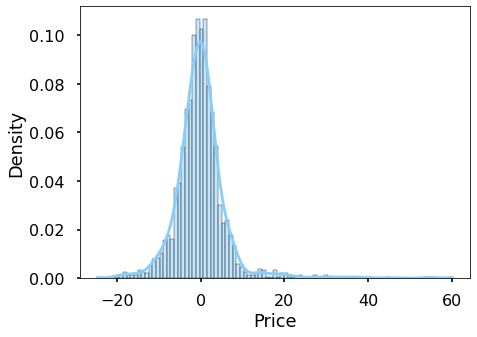

In [ ]:
from seaborn.distributions import histplot
plt.figure(figsize=(7,5))
sns.histplot(data = error, stat = 'density', color = 'lightskyblue', kde = True)
plt.show()

## The errors are distributed normally. There is some skewness in the error but in general it looks normal. Also, because R2 is 66%, and if we could achieve higher R2, then this could improve.

#Homoscedasticity 

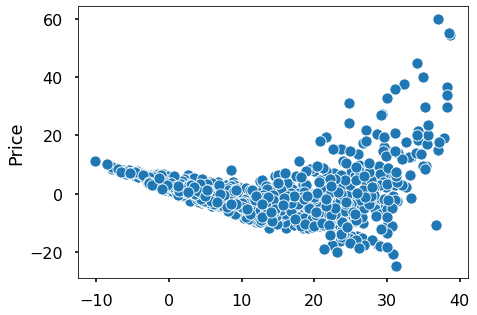

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x =Model_Predict_Price.predict(x_test), y = error)
plt.show()

### The values are centered around zero but for higher predictions, errors are also higher. These errors are not random completely. So there is some room for improvement in our model, this was also depicted in the normality test figure above.

In [ ]:
GetMyCoefficeints = pd.DataFrame(np.append(Model_Predict_Price.coef_, Model_Predict_Price.intercept_),
                       index = X.columns.tolist()+['Intercept'],
                       columns=['Coefficient']).sort_values(by = ['Coefficient'], key = abs, ascending = False)
GetMyCoefficeints.T

,Kilometers_Driven_log,New_Price_log,Intercept,Engine_log,Seats,Petrol,Mileage,Coimbatore,Diesel,Manual,...,Hyderabad,Second,Bangalore,Mumbai,Kochi,Chennai,Jaipur,LPG,Pune,Delhi
Coefficient,-34.106,33.419,21.916,18.377,-7.911,-4.303,4.129,3.583,-2.962,-2.483,...,1.822,-1.817,1.814,-1.693,1.295,1.025,1.019,-0.332,0.262,-0.194


#Conclusions:
1. Positive values of coefficients mean that they affect the price of used car positively, and negative coefficients mean that they affect the price negatively.
2. Kilometer_Driven_log has negative coefficient and it has the highest value. This is the most important predictor of used car price. Higher the kilometer driven is for any car, lower the price of the car is. This makes intitive sense also.
3. New_Price_log is second most important variable to predict used car price. It is positive, and it means that higher the price of a used car, higher it will sell as used car. 
4. Intercept is not always easy to interpret. It is the value of the equation when all other variables have zero value. 
5. Engine_log is the third important predictor of used car price. The coefficient is positive. As the Engine power increases, price of the used car also increases.
6. Number of seats affect the price of used car negatively. Higher the number of seats, lower the price of the car is.
7. Petrol and Diesel fuel type affects the price negatively. 
8. Car with higher mileage sells for higher prices. This makes an intutive sense.
9. Among all locations, Hyderabad and Banglore are the most important cities. Cars sell for higher prices in these cities. Similarly, Kochi, Chennai and Jaipur are other three cities where prices increases, but prices of used car decreases with location in Mumbai.

#Business Recommendations:
* Since Kilometer_Driven is the most important predictor of price, it is suggested to acquire cars with less kilometer_driven for more profit. 
* Expensive cars also sells for higher prices, and it is second important predictor of price after kilometer_driven. So, when acquiring cars, focus also on the price of the car when it is new. These two are very impoirtant factors to predict price.
* Get cars with less number of seats, as the price reduces with the increase in seats.
* Among all cities, Hyderabad and Banglore are two most important locations to get higer prices for used cars. Cinsider selling cars in these locations. Furthermore, Kochi, Chennai and Jaipur are other citieis where you can get good price on used cars, but in Mumbai, you will get low price for used cars. So, the firm may consider selling cars in cities other than Mumbai to get good price.

In [ ]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/AIML/Cars4U_Project2/Price.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/AIML/Cars4U_Project2/Cars4_U_NareshNeupane.ipynb to html
[NbConvertApp] Writing 3535653 bytes to /content/drive/MyDrive/AIML/Cars4U_Project2/Cars4_U_NareshNeupane.html
